In [3]:
import os
import urllib.request

# Download OECD Better Life Index data
oecd_url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/oecd_bli_2015.csv"
gdp_url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/gdp_per_capita.csv"

os.makedirs("datasets/lifesat", exist_ok=True)
urllib.request.urlretrieve(oecd_url, "datasets/lifesat/oecd_bli_2015.csv")
urllib.request.urlretrieve(gdp_url, "datasets/lifesat/gdp_per_capita.csv")

# Now load the data
oecd_bli = pd.read_csv("datasets/lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("datasets/lifesat/gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")


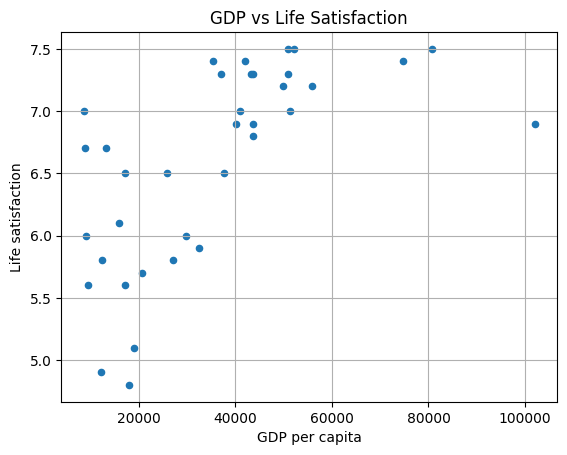

Predicted Life Satisfaction for Cyprus: 6.286536373197453


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Define the function to prepare data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    return full_country_stats[["GDP per capita", "Life satisfaction"]]

# Load the downloaded datasets
oecd_bli = pd.read_csv("datasets/lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("datasets/lifesat/gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.title("GDP vs Life Satisfaction")
plt.grid(True)
plt.show()

# Train a linear regression model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

# Predict Life Satisfaction for Cyprus
X_new = [[22587]]  # GDP per capita for Cyprus
prediction = model.predict(X_new)
print("Predicted Life Satisfaction for Cyprus:", prediction[0][0])


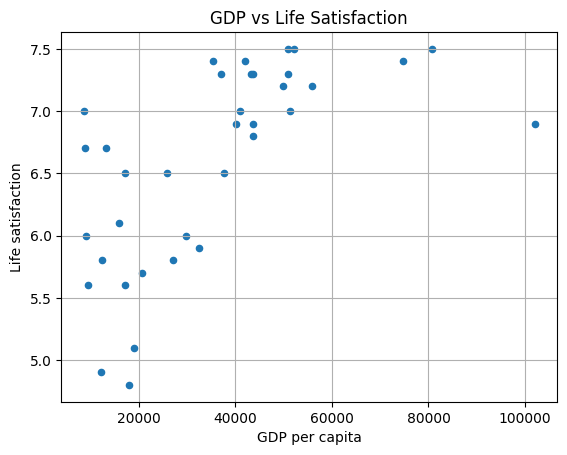

Predicted Life Satisfaction for Cyprus: 5.766666666666666


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.neighbors

# Define the function to prepare data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    return full_country_stats[["GDP per capita", "Life satisfaction"]]

# Load the downloaded datasets
oecd_bli = pd.read_csv("datasets/lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("datasets/lifesat/gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.title("GDP vs Life Satisfaction")
plt.grid(True)
plt.show()

# Train a K-Nearest Neighbors model
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)

# Predict Life Satisfaction for Cyprus
X_new = [[22587]]  # GDP per capita for Cyprus
prediction = model.predict(X_new)
print("Predicted Life Satisfaction for Cyprus:", prediction[0][0])

